In [2]:
%%capture
#pip install import_ipynb
import import_ipynb

from Views import data_pre_lockdown

In [1]:
import random
import matplotlib.pyplot as plt

Here I have loaded the data for pre lockdown with previously discussed hyperparameters.

240
241


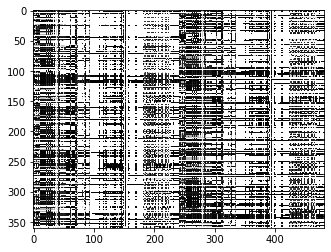

In [3]:
C_p_6 = data_pre_lockdown(verbose = False, final_data = False)

Q. How do we study the spread of epidemic / pandemics?

A. We use the SIR epidemic model which was first used to model the pandemic / epidemic in 1920s, to analyze human to human transmission of communicable disease.

And here I implement a modified SIR epidemic model with the rates of infection and deaths studied previously, to predict the outcomes over 100 days.

In [4]:
def no_lock_simple(C_p_6):
    # Total population, N.
    N = len(C_p_6)
    # Initial number of individuals.
    Infected, Recovered, Deaths, Contact = 1, 0, 0, 0
    # New number of individuals.
    New_Infected, New_Recovered, New_Deaths, New_Contact = 1, 0, 0, 0
    # Everyone else, S0, is susceptible to infection initially.
    Susceptible = N - Infected - Recovered - Deaths
    # Contact rate, beta, mean recovery rate, gamma, (in 1/days), and mean death rate, tau, (in 1/days).
    beta, gamma, tau = 0.036234, 1./22.2678, 1./17.17286

    S = []
    S.append(Susceptible)
    I = []
    I.append(Infected)
    R = []
    R.append(Recovered)
    C = []
    C.append(Contact)
    D = []
    D.append(Deaths)

    # Number of Days
    no_days = 100
    for day in range(no_days):
        print('day: ' + str(day))
        New_Contact = 0
        if Contact < N:
            if day > 6:
                for j in range(New_Infected + Infected - I[day - 7]):
                    New_Contact += random.choice(C_p_6)
            else:
                for j in range(New_Infected):
                    New_Contact += random.choice(C_p_6)
        else:
            New_Contact = 0
        
        New_Contact = int(New_Contact)
    
        if New_Contact > N - Contact:
            New_Contact = N - Contact
        print('New_Contact: ' + str(New_Contact))
        
        if day > 0:
            #print('if_1')
            if day > 6:
                New_Infected = int(beta * (New_Contact + Contact - C[day -7]))
            else:
                New_Infected = int(beta * New_Contact)
        else:
            New_Infected = 1
    
        if New_Infected < 0:
            New_Infected = 0
        print('New_Infected: ' + str(New_Infected))
    
        New_Contact -= New_Infected
        Contact -= New_Infected
        if day < 22:
            New_Recovered = 0
        else:
            New_Recovered = int(gamma * Infected)
            Infected -= New_Recovered
    
        print('New_Recovered: ' + str(New_Recovered))
    
        if day < 39:
            New_Deaths = 0
        else:
            New_Deaths = int(tau * Infected)
            Infected -= New_Deaths
    
        print('New_Deaths: ' + str(New_Deaths))
    
        Infected += New_Infected
        Recovered += New_Recovered
        Deaths += New_Deaths
        Contact += New_Contact
        if Contact > N:
            Contact = N
        Susceptible = N - Infected - Recovered - Deaths
        S.append(Susceptible)
        I.append(Infected)
        R.append(Recovered)
        C.append(Contact)
        D.append(Deaths)
        
    plt.plot(range(101), S, label = 'S')
    plt.plot(range(101), I, label = 'A')
    plt.plot(range(101), R, label = 'R')
    plt.plot(range(101), C, label = 'C')
    plt.plot(range(101), D, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('No_Lock_Simple')
    plt.show()
    
    plt.plot(range(101), I, label = 'A')
    plt.plot(range(101), R, label = 'R')
    plt.plot(range(101), D, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('No_Lock_Simple')
    plt.show()

S: Susceptible

A: Active

R: Recovered

C: Contacts

D: Deaths

day: 0
New_Contact: 12
New_Infected: 1
New_Recovered: 0
New_Deaths: 0
day: 1
New_Contact: 12
New_Infected: 0
New_Recovered: 0
New_Deaths: 0
day: 2
New_Contact: 0
New_Infected: 0
New_Recovered: 0
New_Deaths: 0
day: 3
New_Contact: 0
New_Infected: 0
New_Recovered: 0
New_Deaths: 0
day: 4
New_Contact: 0
New_Infected: 0
New_Recovered: 0
New_Deaths: 0
day: 5
New_Contact: 0
New_Infected: 0
New_Recovered: 0
New_Deaths: 0
day: 6
New_Contact: 0
New_Infected: 0
New_Recovered: 0
New_Deaths: 0
day: 7
New_Contact: 12
New_Infected: 1
New_Recovered: 0
New_Deaths: 0
day: 8
New_Contact: 24
New_Infected: 1
New_Recovered: 0
New_Deaths: 0
day: 9
New_Contact: 254
New_Infected: 10
New_Recovered: 0
New_Deaths: 0
day: 10
New_Contact: 1126
New_Infected: 50
New_Recovered: 0
New_Deaths: 0
day: 11
New_Contact: 5047
New_Infected: 229
New_Recovered: 0
New_Deaths: 0
day: 12
New_Contact: 21416
New_Infected: 989
New_Recovered: 0
New_Deaths: 0
day: 13
New_Contact: 95129
New_Infected: 4364
New_Recovered: 0
New_Deaths: 0
d

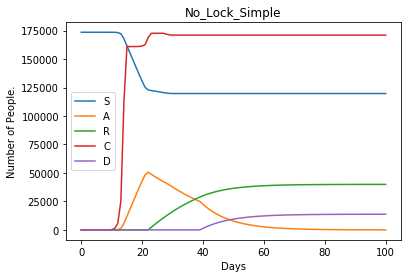

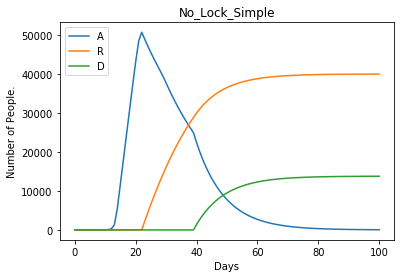

In [5]:
no_lock_simple(C_p_6)

Q. Do the rates for infection and deaths, remain same for all the population?

A. No. The studies have showed people above 50 years of age are more likely victims.

Here I assume double rates for around 34 % of population, who are above 50 years of age.

In [6]:
def no_lock_complete(C_p_6):
    # Total population, N.
    N_Young = int(len(C_p_6) * 0.66)
    # Total population, N.
    N_Old = len(C_p_6) - N_Young
    # Total population, N.
    N = len(C_p_6)
    # Initial number of individuals.
    Infected_Young, Recovered_Young, Deaths_Young, Contact_Young = 1, 0, 0, 0
    # Initial number of individuals.
    Infected_Old, Recovered_Old, Deaths_Old, Contact_Old = 0, 0, 0, 0
    # Initial number of individuals.
    Infected, Recovered, Deaths, Contact = 1, 0, 0, 0
    # New number of individuals.
    New_Infected_Young, New_Recovered_Young, New_Deaths_Young, New_Contact_Young = 1, 0, 0, 0
    # New number of individuals.
    New_Infected_Old, New_Recovered_Old, New_Deaths_Old, New_Contact_Old = 0, 0, 0, 0
    # New number of individuals.
    New_Infected, New_Recovered, New_Deaths, New_Contact = 1, 0, 0, 0
    # Everyone else, S0, is susceptible to infection initially.
    Susceptible_Young = N_Young - Infected_Young - Recovered_Young - Deaths_Young
    # Everyone else, S0, is susceptible to infection initially.
    Susceptible_Old = N_Old - Infected_Old - Recovered_Old - Deaths_Old
    # Everyone else, S0, is susceptible to infection initially.
    Susceptible = N - Infected - Recovered - Deaths
    # Contact rate, beta, mean recovery rate, gamma, (in 1/days), and mean death rate, tau, (in 1/days).
    beta_Young, gamma_Young, tau_Young = 0.02518, 1./20, 1./22
    # Contact rate, beta, mean recovery rate, gamma, (in 1/days), and mean death rate, tau, (in 1/days).
    beta_Old, gamma_Old, tau_Old = 0.057692, 1./26.6667, 1./12
    
    S_Young = []
    S_Young.append(Susceptible_Young)
    I_Young = []
    I_Young.append(Infected_Young)
    R_Young = []
    R_Young.append(Recovered_Young)
    C_Young = []
    C_Young.append(Contact_Young)
    D_Young = []
    D_Young.append(Deaths_Young)
    S_Old = []
    S_Old.append(Susceptible_Old)
    I_Old = []
    I_Old.append(Infected_Old)
    R_Old = []
    R_Old.append(Recovered_Old)
    C_Old = []
    C_Old.append(Contact_Old)
    D_Old = []
    D_Old.append(Deaths_Old)
    S = []
    S.append(Susceptible)
    I = []
    I.append(Infected)
    R = []
    R.append(Recovered)
    C = []
    C.append(Contact)
    D = []
    D.append(Deaths)

    # Number of Days
    no_days = 100
    for day in range(no_days):
        
        
        print('day: ' + str(day))
        
        
        New_Contact_Young = 0
        New_Contact_Old = 0
        
        
        if Contact_Young < N_Young:
            if day > 6:
                for j in range(New_Infected_Young + Infected_Young - I_Young[day - 7]):
                    New_Contact_Young += random.choice(C_p_6)
            else:
                for j in range(New_Infected_Young):
                    New_Contact_Young += random.choice(C_p_6)
        else:
            New_Contact_Young = 0
        
        if Contact_Old < N_Old:
            if day > 6:
                for j in range(New_Infected_Old + Infected_Old - I_Old[day - 7]):
                    New_Contact_Old += random.choice(C_p_6)
            else:
                for j in range(New_Infected_Old):
                    New_Contact_Old += random.choice(C_p_6)
        else:
            New_Contact_Old = 0
        
        
        New_Contact_Young = int(New_Contact_Young)
        New_Contact_Old = int(New_Contact_Old)
    
        
        if New_Contact_Young > N_Young - Contact_Young:
            New_Contact_Young = N_Young - Contact_Young
        print('New_Contact_Young: ' + str(New_Contact_Young))
        
        if New_Contact_Old > N_Old - Contact_Old:
            New_Contact_Old = N_Old - Contact_Old
        print('New_Contact_Old: ' + str(New_Contact_Old))
        
        
        if day > 0:
            #print('if_1')
            if day > 6:
                New_Infected_Young = int(beta_Young * (New_Contact_Young + Contact_Young - C_Young[day -7]))
            else:
                New_Infected_Young = int(beta_Young * New_Contact_Young)
        else:
            New_Infected_Young = 1
    
        if day > 0:
            #print('if_1')
            if day > 6:
                New_Infected_Old = int(beta_Old * (New_Contact_Old + Contact_Old - C_Old[day -7]))
            else:
                New_Infected_Old = int(beta_Old * New_Contact_Old)
        else:
            New_Infected_Old = 1
    
        
        if New_Infected_Young < 0:
            New_Infected_Young = 0
        print('New_Infected_Young: ' + str(New_Infected_Young))
    
        if New_Infected_Old < 0:
            New_Infected_Old = 0
        print('New_Infected_Old: ' + str(New_Infected_Old))
    
        
        New_Contact_Young -= New_Infected_Young
        New_Contact_Old -= New_Infected_Old
        
        
        Contact_Young -= New_Infected_Young
        Contact_Old -= New_Infected_Old
        
        
        if day < 22:
            New_Recovered_Young = 0
        else:
            New_Recovered_Young = int(gamma_Young * Infected_Young)
            Infected_Young -= New_Recovered_Young
            Infected -= New_Recovered_Young

        if day < 22:
            New_Recovered_Old = 0
        else:
            New_Recovered_Old = int(gamma_Old * Infected_Old)
            Infected_Old -= New_Recovered_Old
            Infected -= New_Recovered_Old

        
        print('New_Recovered_Young: ' + str(New_Recovered_Young))
        print('New_Recovered_Old: ' + str(New_Recovered_Old))
    
        
        if day < 39:
            New_Deaths_Young = 0
        else:
            New_Deaths_Young = int(tau_Young * Infected_Young)
            Infected_Young -= New_Deaths_Young
            Infected -= New_Deaths_Young
    
        if day < 39:
            New_Deaths_Old = 0
        else:
            New_Deaths_Old = int(tau_Old * Infected_Old)
            Infected_Old -= New_Deaths_Old
            Infected -= New_Deaths_Old
    
        
        print('New_Deaths_Young: ' + str(New_Deaths_Young))
        print('New_Deaths_Old: ' + str(New_Deaths_Old))
    
        
        Infected_Young += New_Infected_Young
        Recovered_Young += New_Recovered_Young
        Deaths_Young += New_Deaths_Young
        Contact_Young += New_Contact_Young
        
        Infected_Old += New_Infected_Old
        Recovered_Old += New_Recovered_Old
        Deaths_Old += New_Deaths_Old
        Contact_Old += New_Contact_Old
        
        
        if Contact_Young > N_Young:
            Contact_Young = N_Young
        Susceptible_Young = N_Young - Infected_Young - Recovered_Young - Deaths_Young
        
        if Contact_Old > N_Old:
            Contact_Old = N_Old
        Susceptible_Old = N_Old - Infected_Old - Recovered_Old - Deaths_Old
        
        
        S_Young.append(Susceptible_Young)
        I_Young.append(Infected_Young)
        R_Young.append(Recovered_Young)
        C_Young.append(Contact_Young)
        D_Young.append(Deaths_Young)
        
        S_Old.append(Susceptible_Old)
        I_Old.append(Infected_Old)
        R_Old.append(Recovered_Old)
        C_Old.append(Contact_Old)
        D_Old.append(Deaths_Old)
        
        
        New_Infected = New_Infected_Young + New_Infected_Old
        New_Recovered = New_Recovered_Young + New_Recovered_Old
        New_Deaths = New_Deaths_Young + New_Deaths_Old
        New_Contact = New_Contact_Young + New_Contact_Old
        
        
        Infected += New_Infected
        Recovered += New_Recovered
        Deaths += New_Deaths
        Contact += New_Contact
        
        
        if Contact > N:
            Contact = N
        Susceptible = N - Infected - Recovered - Deaths
        

        S.append(Susceptible)
        I.append(Infected)
        R.append(Recovered)
        C.append(Contact)
        D.append(Deaths)

    #print('Infected: ' + str(I))
    
    plt.plot(range(101), S, label = 'S')
    plt.plot(range(101), I, label = 'A')
    plt.plot(range(101), R, label = 'R')
    plt.plot(range(101), C, label = 'C')
    plt.plot(range(101), D, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('Total')
    plt.show()
    
    plt.plot(range(101), I, label = 'A')
    plt.plot(range(101), R, label = 'R')
    plt.plot(range(101), D, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('Total')
    plt.show()
    
    #print('Infected_Young: ' + str(I_Young))
    
    plt.plot(range(101), S_Young, label = 'S')
    plt.plot(range(101), I_Young, label = 'A')
    plt.plot(range(101), R_Young, label = 'R')
    plt.plot(range(101), C_Young, label = 'C')
    plt.plot(range(101), D_Young, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('Young')
    plt.show()
    
    plt.plot(range(101), I_Young, label = 'A')
    plt.plot(range(101), R_Young, label = 'R')
    plt.plot(range(101), D_Young, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('Young')
    plt.show()#print('Infected_Old: ' + str(I_Old))

    plt.plot(range(101), S_Old, label = 'S')
    plt.plot(range(101), I_Old, label = 'A')
    plt.plot(range(101), R_Old, label = 'R')
    plt.plot(range(101), C_Old, label = 'C')
    plt.plot(range(101), D_Old, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('Old')
    plt.show()
    
    plt.plot(range(101), I_Old, label = 'A')
    plt.plot(range(101), R_Old, label = 'R')
    plt.plot(range(101), D_Old, label = 'D')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Number of People.')
    plt.title('Old')
    plt.show()

S: Susceptible

A: Active

R: Recovered

C: Contacts

D: Deaths

day: 0
New_Contact_Young: 12
New_Contact_Old: 0
New_Infected_Young: 1
New_Infected_Old: 1
New_Recovered_Young: 0
New_Recovered_Old: 0
New_Deaths_Young: 0
New_Deaths_Old: 0
day: 1
New_Contact_Young: 88
New_Contact_Old: 87
New_Infected_Young: 2
New_Infected_Old: 5
New_Recovered_Young: 0
New_Recovered_Old: 0
New_Deaths_Young: 0
New_Deaths_Old: 0
day: 2
New_Contact_Young: 24
New_Contact_Old: 356
New_Infected_Young: 0
New_Infected_Old: 20
New_Recovered_Young: 0
New_Recovered_Old: 0
New_Deaths_Young: 0
New_Deaths_Old: 0
day: 3
New_Contact_Young: 0
New_Contact_Old: 604
New_Infected_Young: 0
New_Infected_Old: 34
New_Recovered_Young: 0
New_Recovered_Old: 0
New_Deaths_Young: 0
New_Deaths_Old: 0
day: 4
New_Contact_Young: 0
New_Contact_Old: 1745
New_Infected_Young: 0
New_Infected_Old: 100
New_Recovered_Young: 0
New_Recovered_Old: 0
New_Deaths_Young: 0
New_Deaths_Old: 0
day: 5
New_Contact_Young: 0
New_Contact_Old: 3691
New_Infected_Young: 0
New_Infected_Old: 212
New_Recovered_Young: 0
New_Recovered

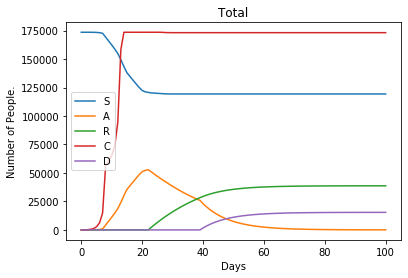

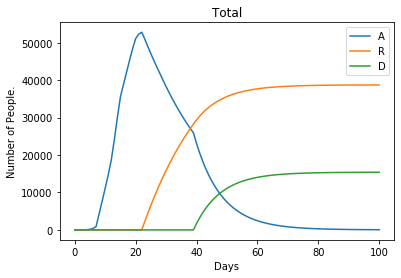

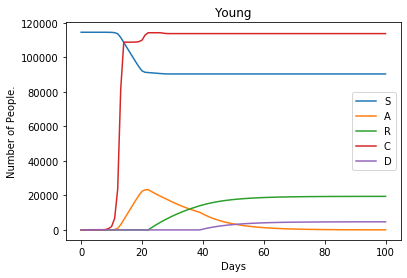

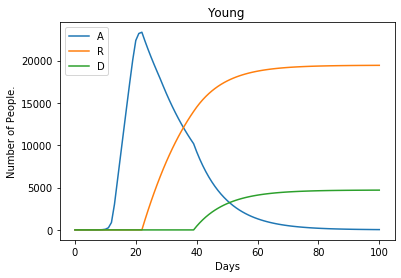

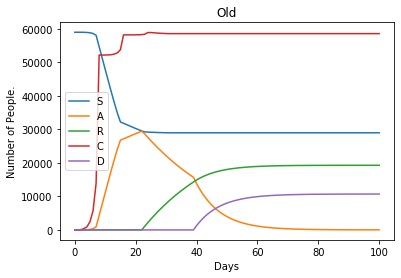

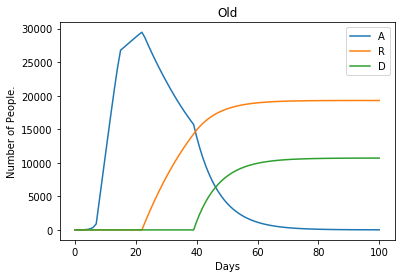

In [7]:
no_lock_complete(C_p_6)

Source:

http://mat.uab.cat/matmat/PDFv2013/v2013n03.pdf